In [1]:
#导入库
import pandas as pd
import numpy as np
import re

### 预处理

In [2]:
#通过pandas读入数据
data = pd.read_csv('dataset7classes.csv',encoding='utf-8',header=None)
#声列名
data.columns=[ 'class_label','text']

In [3]:
#打印数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25904 entries, 0 to 25903
Data columns (total 2 columns):
class_label    25904 non-null object
text           25898 non-null object
dtypes: object(2)
memory usage: 404.8+ KB


In [4]:
#查看text是否有空值
data['text'].isnull().value_counts() 

False    25898
True         6
Name: text, dtype: int64

In [5]:
#查看class_label是否有空值
data['class_label'].isnull().value_counts()

False    25904
Name: class_label, dtype: int64

In [6]:
#使用指定的方法填充null值
import numpy as np
data['text'].fillna(np.NaN).head(1)

0    文本理解、自我理解与自我塑造诠释学文本理解自我理解自我塑造诠释学是一门关于文本理解、自我理解...
Name: text, dtype: object

In [7]:
#series对象中删除
data.dropna(inplace=True)

In [8]:
#打印信息
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25898 entries, 0 to 25903
Data columns (total 2 columns):
class_label    25898 non-null object
text           25898 non-null object
dtypes: object(2)
memory usage: 607.0+ KB


In [9]:
#如果正则表达式清洗非中文字符
re_data=[]
for i in data["text"]:
    i_re=''.join(re.findall(r'[\u4e00-\u9fa5]', i))
    re_data.append(i_re.strip())
data["text"]=re_data

In [10]:
#类别标签数值化
from sklearn import preprocessing
le = preprocessing.LabelEncoder().fit_transform(data['class_label'])
data["class_label"]=le
data["class_label"].head()

0    0
1    0
2    0
3    0
4    0
Name: class_label, dtype: int64

In [11]:
#分词
import jieba,csv
#加载自定义词典
jieba.load_userdict('dict_out.csv')
#加载停用词表
stopkey=[line.strip().decode('utf-8') for line in  open("stopwords.dat","rb").readlines()]
list1 =[]
list2=[]
j=0
for i in data["text"]:
    j+=1
    if j %1000 ==0:
        print(j)
    try:
        jiebas=jieba.cut(i)
        jiebas = [w for w in jiebas if w not in stopkey]
        fenci_key = ",".join(jiebas)
    except AttributeError:
        continue
    finally:
        list2.append(jiebas)
        list1.append(fenci_key.strip())  
#将分分词结果写入data
data["tokens"]=list1  

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wo\AppData\Local\Temp\jieba.cache
Loading model cost 1.086 seconds.
Prefix dict has been built succesfully.


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


In [12]:
data.head(1)

,class_label,text,tokens
0,0,文本理解自我理解与自我塑造诠释学文本理解自我理解自我塑造诠释学是一门关于文本理解自我理解和自...,"文本,理解,自我,理解,自我,塑造,诠释,文本,理解,自我,理解,自我,塑造,诠释,是一门,..."


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25898 entries, 0 to 25903
Data columns (total 3 columns):
class_label    25898 non-null int64
text           25898 non-null object
tokens         25898 non-null object
dtypes: int64(1), object(2)
memory usage: 809.3+ KB


In [14]:
#得到所有的词语
all_words=[] 
for lin,label in zip(data["tokens"],data["class_label"]):
    for word in list(lin.split(",")):
        all_words.append([label,word.strip()])
#词语总数
sentence_lengths=len(all_words)

#得到所有的词语
all_words1=[] 
for i in all_words:
    all_words1.append(i[1])  
VOCAB=len(set(all_words1))  
print("单词总数%s, 词汇量 %s" % (len(all_words), VOCAB))

单词总数1980246, 词汇量 78783


In [15]:
all_words[0:10]

[[0, '文本'],
 [0, '理解'],
 [0, '自我'],
 [0, '理解'],
 [0, '自我'],
 [0, '塑造'],
 [0, '诠释'],
 [0, '文本'],
 [0, '理解'],
 [0, '自我']]

In [16]:
da=pd.DataFrame(all_words, columns=["key","value"])
da.head(5)

,key,value
0,0,文本
1,0,理解
2,0,自我
3,0,理解
4,0,自我


In [47]:
#按类别汇总词词语
label_word_dic={}
for key,value in zip(da["key"],da["value"]):
    if key in label_word_dic.keys():
        label_word_dic[key].append(value)
    else:
        label_word_dic[key]=[value]
label_word_dic

{0: ['文本',
  '理解',
  '自我',
  '理解',
  '自我',
  '塑造',
  '诠释',
  '文本',
  '理解',
  '自我',
  '理解',
  '自我',
  '塑造',
  '诠释',
  '是一门',
  '文本',
  '理解',
  '自我',
  '理解',
  '自我',
  '塑造',
  '学问',
  '读者',
  '文本',
  '理解',
  '自我',
  '理解',
  '获得了',
  '一种',
  '新的',
  '方式',
  '在此',
  '意义上',
  '自我',
  '理解',
  '诠释',
  '学的',
  '教化',
  '功能',
  '亦即',
  '实践性',
  '体现',
  '文本',
  '理解',
  '乃是',
  '自我',
  '塑造',
  '起点',
  '正确理解',
  '文本',
  '自我',
  '塑造',
  '才得以',
  '建立在',
  '可靠',
  '基础之上',
  '诠释',
  '学的',
  '探索',
  '是一项',
  '包含着',
  '理论',
  '实践',
  '双重',
  '这一点',
  '凸显',
  '诠释',
  '学的',
  '实践',
  '品格',
  '理解',
  '方法论',
  '西方',
  '诠释',
  '提供',
  '系统',
  '方法论',
  '体系',
  '但这',
  '今日',
  '诠释',
  '研究',
  '不仅是',
  '我们自己',
  '传统',
  '以及对',
  '传统',
  '反思',
  '包含了',
  '异质',
  '文化',
  '思想',
  '资源',
  '消化',
  '接受',
  '提炼出',
  '德',
  '理念',
  '借鉴',
  '西方',
  '诠释',
  '理解',
  '方法论',
  '思想',
  '资源',
  '反思',
  '梳理',
  '我们的',
  '诠释',
  '经验',
  '建构',
  '中国',
  '诠释',
  '历史唯物主义',
  '方法论',
  '视角',
  '学术',
  '意义',
  '西方',
  '学界',
  '几种',
  

In [48]:
#按类别统计词频
group_word_count={}        
for key in label_word_dic.keys():
    fdict_word_count={}
    for words in label_word_dic[key]:
        if words in fdict_word_count.keys():
            fdict_word_count[words] +=1
        else:
            fdict_word_count[words] =1
    li=sorted(fdict_word_count.items(), key=lambda d:d[1],reverse=True)
    group_word_count[key]=li
group_word_count[1][0:10]

[('理论', 1912),
 ('社会', 1907),
 ('发展', 1762),
 ('政治', 1643),
 ('共产党', 1579),
 ('建设', 1543),
 ('政府', 1541),
 ('治理', 1454),
 ('研究', 1437),
 ('国家', 1407)]

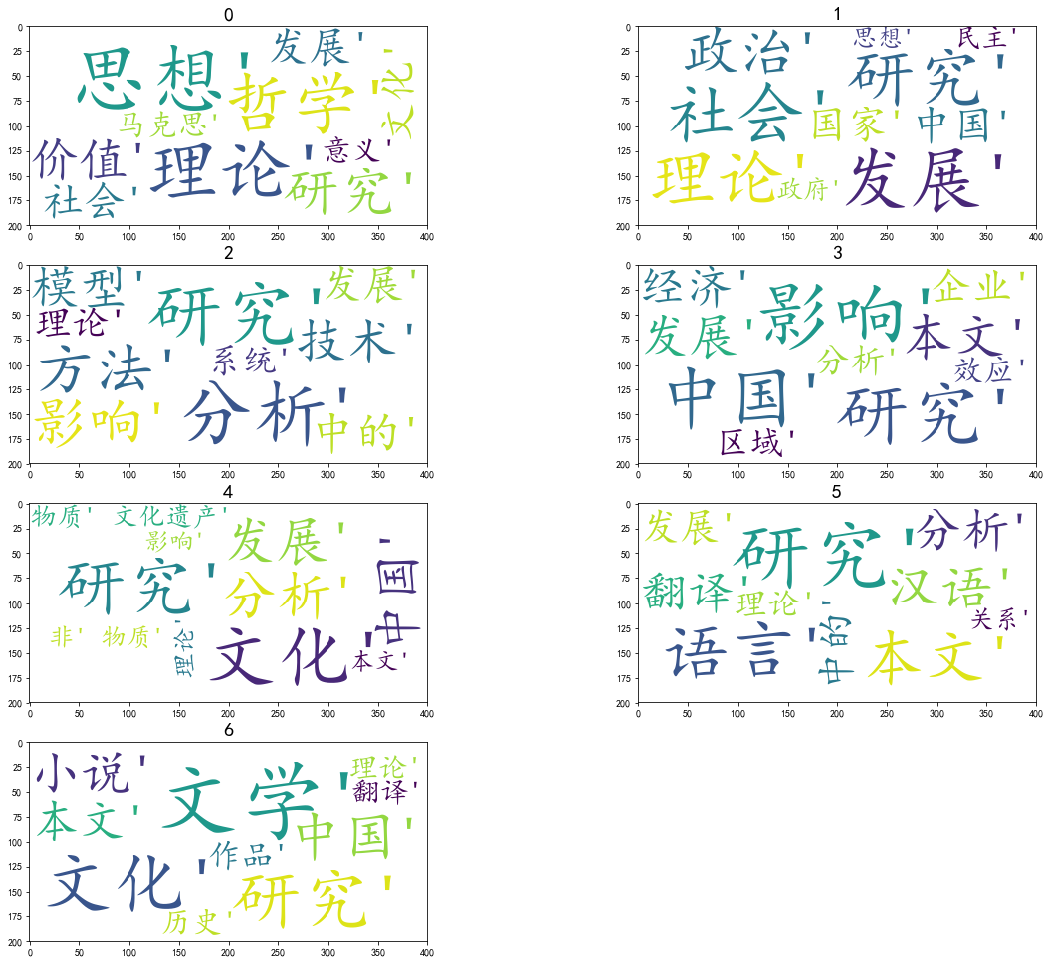

In [20]:
#通过词云分别打印不同类别的出现频数前10的词汇
import numpy as  np
import matplotlib.pyplot as plt
#词云生成工具
from wordcloud import WordCloud
#需要对中文进行处理
import matplotlib.font_manager as fm
fig = plt.figure(figsize=(20, 30))  
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
for i in range(7):
    wc=WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        random_state=100,
        max_words=10,
        font_path='C:/Windows/Fonts/simkai.ttf')   #中文处理，用系统自带的字体
    wc.generate(str(label_word_dic[i]))
    #为图片设置字体
    my_font=fm.FontProperties(fname='C:/Windows/Fonts/simkai.ttf')
    plt.subplot(7,2,i+1)
    plt.imshow(wc)
    plt.title(i, fontsize=20)
plt.show()

### 分类

In [21]:
#数据划分
from sklearn.model_selection import train_test_split 
#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data["tokens"], data["class_label"], test_size=0.2,random_state=1)

In [22]:
from sklearn.linear_model import LogisticRegression
#逻辑回归模型进行分类
clf = LogisticRegression(C=10.0, solver='newton-cg',multi_class='multinomial', n_jobs=-1)
#http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [23]:
#结果评估
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
def get_metrics(y_test, y_predicted):
    """
    y_test:真实值
    y_predicted：预测值
    """
    #精确度=真阳性/（真阳性+假阳性）
    precision = precision_score(y_test, y_predicted, pos_label=None,average='weighted')             
    #召回率=真阳性/（真阳性+假阴性）
    recall = recall_score(y_test, y_predicted, pos_label=None,average='weighted')   
    # F1
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    #准确率
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

#### 词袋模型

In [24]:
#声明文本特征提取方法
from sklearn.feature_extraction.text import CountVectorizer
def cv(data):
    #把每一个单词都进行统计，同时计算每个单词出现的次数。默认过滤掉单字符
    count_vectorizer = CountVectorizer(token_pattern=r'\b\w+\b') 
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

In [25]:
#文本特征提取
X_train_counts,count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [26]:
#训练模型
clf.fit(X_train_counts, y_train)
#模型预测
y_predicted_counts = clf.predict(X_test_counts)
#模型评估
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.6f, precision = %.6f, recall = %.6f, f1 = %.6f" % (accuracy, precision, recall, f1))

accuracy = 0.918919, precision = 0.918914, recall = 0.918919, f1 = 0.918898


#### TF-IDF

In [27]:
#声明文本特征提取方法
from sklearn.feature_extraction.text import TfidfVectorizer 
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    train = tfidf_vectorizer.fit_transform(data)
    return train, tfidf_vectorizer

In [28]:
#文本特征提取
X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [29]:
#声明模型
clf_tfidf = LogisticRegression(C=10.0, solver='newton-cg',multi_class='multinomial', n_jobs=-1)
#训练
clf_tfidf.fit(X_train_tfidf, y_train)
#预测结果
y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)
##模型评估
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.6f, precision = %.6f, recall = %.6f, f1 = %.6f" % (accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf))

accuracy = 0.930502, precision = 0.930516, recall = 0.930502, f1 = 0.930494


#### word2vec

In [30]:
list2[0:1]

[['文本',
  '理解',
  '自我',
  '理解',
  '自我',
  '塑造',
  '诠释',
  '文本',
  '理解',
  '自我',
  '理解',
  '自我',
  '塑造',
  '诠释',
  '是一门',
  '文本',
  '理解',
  '自我',
  '理解',
  '自我',
  '塑造',
  '学问',
  '读者',
  '文本',
  '理解',
  '自我',
  '理解',
  '获得了',
  '一种',
  '新的',
  '方式',
  '在此',
  '意义上',
  '自我',
  '理解',
  '诠释',
  '学的',
  '教化',
  '功能',
  '亦即',
  '实践性',
  '体现',
  '文本',
  '理解',
  '乃是',
  '自我',
  '塑造',
  '起点',
  '正确理解',
  '文本',
  '自我',
  '塑造',
  '才得以',
  '建立在',
  '可靠',
  '基础之上',
  '诠释',
  '学的',
  '探索',
  '是一项',
  '包含着',
  '理论',
  '实践',
  '双重',
  '这一点',
  '凸显',
  '诠释',
  '学的',
  '实践',
  '品格',
  '理解',
  '方法论',
  '西方',
  '诠释',
  '提供',
  '系统',
  '方法论',
  '体系',
  '但这',
  '今日',
  '诠释',
  '研究',
  '不仅是',
  '我们自己',
  '传统',
  '以及对',
  '传统',
  '反思',
  '包含了',
  '异质',
  '文化',
  '思想',
  '资源',
  '消化',
  '接受',
  '提炼出',
  '德',
  '理念',
  '借鉴',
  '西方',
  '诠释',
  '理解',
  '方法论',
  '思想',
  '资源',
  '反思',
  '梳理',
  '我们的',
  '诠释',
  '经验',
  '建构',
  '中国',
  '诠释']]

#### 自定义训练word2vec

In [31]:
#word2vec
from gensim.models import Word2Vec

#训练数据
sentences = list2
#min_count：忽略频率低于改值的词
#size：训练的词向量的长度
model = Word2Vec(min_count=1,size=5)
#构建词汇表
model.build_vocab(sentences)
#训练
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)

#保存模型,binary:以二进制文件保存
# model.wv.save_word2vec_format("word2vec_model_5.bin",binary=True)

#保存模型
model.wv.save_word2vec_format("word2vec_model_5.txt")
#获取训练结果中指定词的结果向量

D:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if sys.path[0] == '':


In [32]:
import gensim
word2vec_path ="word2vec_model_5.txt"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path)
word2vec.wv["文本"]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


array([ 0.92984498, -6.14548874,  1.67873502, -3.26562953,  2.32924223], dtype=float32)

##### 使用google新闻数据训练的模型

In [33]:
# 加载模型
import gensim
word2vec_path ="GoogleNews-vectors-negative300.bin.gz"
word2vec_google = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [34]:
len(word2vec_google.wv["我们"])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


300

In [35]:
len(word2vec_google.wv["文本"])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


KeyError: "word '文本' not in vocabulary"

In [36]:
def get_average_word2vec(tokens_list, vector, k=5):
    #判断数据是否为空，如果为null返回1x300的0向量
    if len(tokens_list)<1:
        return np.zeros(k)
    #如果处于没在vector处理为零向量
    vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    #按每一个词的列求和
    summed = np.sum(vectorized, axis=0)
    #求均值
    averaged = np.divide(summed, length) 
    return averaged

def get_word2vec_embeddings(vectors, data,k):
    embeddings = data['tokens'].apply(lambda x: get_average_word2vec(x, vectors,k))
    return list(embeddings)

In [37]:
embeddings_demo = get_word2vec_embeddings(word2vec, data,k=5)
embeddings_google = get_word2vec_embeddings(word2vec_google, data,k=300)

In [38]:
X_train_word2vec_demo, X_test_word2vec_demo, y_train_word2vec_demo, y_test_word2vec_demo = train_test_split(embeddings_demo, data["class_label"], test_size=0.2, random_state=1)
X_train_word2vec_google, X_test_word2vec_google, y_train_word2vec_google, y_test_word2vec_google = train_test_split(embeddings_google, data["class_label"], test_size=0.2, random_state=1)

In [39]:
clf_wordvec = LogisticRegression(C=10.0, solver='newton-cg',multi_class='multinomial', n_jobs=-1)

In [40]:
#训练
def train_model(X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec):
    clf_wordvec.fit(X_train_word2vec, y_train_word2vec)
    y_predicted_word2vec = clf_wordvec.predict(X_test_word2vec)
    accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
    print("accuracy = %.6f, precision = %.6f, recall = %.6f, f1 = %.6f" % (accuracy_word2vec, precision_word2vec,recall_word2vec, f1_word2vec))
    

In [41]:
train_model(X_train_word2vec_demo, X_test_word2vec_demo, y_train_word2vec_demo, y_test_word2vec_demo)

accuracy = 0.493436, precision = 0.485207, recall = 0.493436, f1 = 0.485120


In [42]:
train_model(X_train_word2vec_google, X_test_word2vec_google, y_train_word2vec_google, y_test_word2vec_google)

accuracy = 0.721622, precision = 0.724633, recall = 0.721622, f1 = 0.721589


##### 查看模型

In [43]:
print(len(clf.coef_[1]))#逻辑回归的参数

71149


In [44]:
clf.intercept_ #表示bais

array([ 1.14246416, -0.12087223,  0.47196207, -2.19213545, -1.49956845,
        1.8224472 ,  0.37570269])

In [45]:
#获取关键字
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    classes ={}
    
    for class_index in range(model.coef_.shape[0]):#获取类别数量
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])] #(单词、权值)
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True) #按照权重值排序
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes
importance = get_most_important_features(count_vectorizer, clf, 10)
importance[1]

{'bottom': [(-0.63010243016598166, '哈维'),
  (-0.65067442870554359, '女性'),
  (-0.6708772281682529, '剩余价值'),
  (-0.69854061996679495, '中国文化'),
  (-0.70177147343873247, '传承'),
  (-0.71920474371909326, '后殖民主义'),
  (-0.72531867629199021, '文学'),
  (-0.7363017627957702, '语言'),
  (-0.74325045678082124, '生态学'),
  (-0.77950027623664453, '军事化')],
 'tops': [(1.2005843128301914, '党的建设'),
  (1.2290229634680121, '共青团'),
  (1.31130395817881, '公共行政'),
  (1.3324231407792839, '政党'),
  (1.4073845702434002, '苏联'),
  (1.4538657310787539, '科学社会主义'),
  (1.5366891084547194, '中国共产党'),
  (1.6017665164814858, '共产主义'),
  (1.840784567600261, '共产党'),
  (2.0118219556332964, '共产党宣言')]}

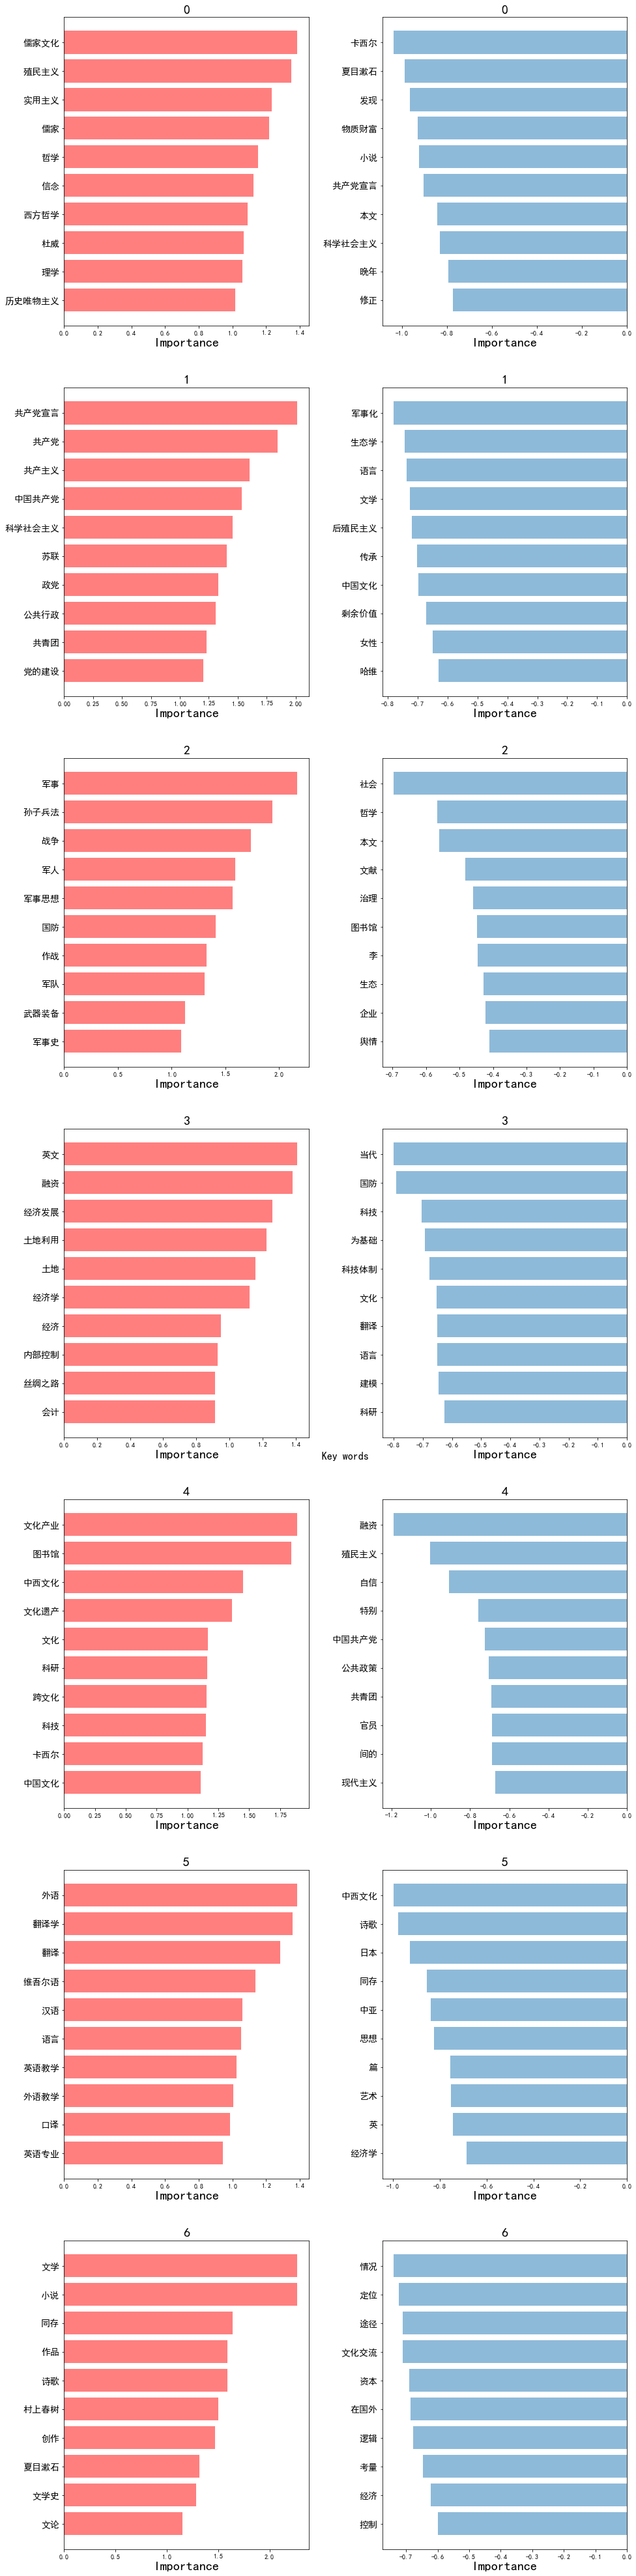

In [46]:
#图示关键字
def plot_important_words(imp_all,name,model):
    fig = plt.figure(figsize=(20, 30))  
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    for i in range(model.coef_.shape[0]):
        top_scores = [a[0] for a in importance[i]['tops']] #权重
        top_words = [a[1] for a in importance[i]['tops']]  #单词
        bottom_scores = [a[0] for a in importance[i]['bottom']] #权重
        bottom_words = [a[1] for a in importance[i]['bottom']]  #单词
               
        y_pos = np.arange(len(top_words))
        top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
        top_pairs = sorted(top_pairs, key=lambda x: x[1])    
        bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
        bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
   
        top_words = [a[0] for a in top_pairs]
        top_scores = [a[1] for a in top_pairs]
    
        bottom_words = [a[0] for a in bottom_pairs]
        bottom_scores = [a[1] for a in bottom_pairs]
    
    
    
        plt.subplot(7,2,i*2+1)
        plt.barh(y_pos,top_scores, align='center', alpha=0.5,color="r")
        plt.title(i, fontsize=20)
        plt.yticks(y_pos, top_words, fontsize=14,)
        plt.suptitle(name, fontsize=16)
        plt.xlabel('Importance', fontsize=20)
        
    
        plt.subplot(7,2,i*2+2)
        plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
        plt.title(i, fontsize=20)
        plt.yticks(y_pos, bottom_words, fontsize=14)
        plt.suptitle('Key words', fontsize=16)
        plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=2,hspace=0.2, wspace=0.3)
    plt.show()
imp_all={}
for i in importance:    
    top_scores = [a[0] for a in importance[i]['tops']] #权重
    top_words = [a[1] for a in importance[i]['tops']]  #单词
    bottom_scores = [a[0] for a in importance[i]['bottom']] #权重
    bottom_words = [a[1] for a in importance[i]['bottom']]  #单词
    imp_all[i] = {
            'top_scores': top_scores,
            'top_words':top_words,
            'bottom_scores':bottom_scores,
            'bottom_words':bottom_words
        }
plot_important_words(imp_all,"最重要的关键字",clf)